In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.4.0


In [2]:
position=50
a = tf.range(position, dtype=tf.float32)
print(a)
print(a.numpy())
print(a.shape)

a = tf.range(position, dtype=tf.float32)[:, tf.newaxis]
print(a.shape)
print(a)

tf.Tensor(
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.], shape=(50,), dtype=float32)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]
(50,)
(50, 1)
tf.Tensor(
[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]
 [24.]
 [25.]
 [26.]
 [27.]
 [28.]
 [29.]
 [30.]
 [31.]
 [32.]
 [33.]
 [34.]
 [35.]
 [36.]
 [37.]
 [38.]
 [39.]
 [40.]
 [41.]
 [42.]
 [43.]
 [44.]
 [45.]
 [46.]
 [47.]
 [48.]
 [49.]], shape=(50, 1), dtype=float32)


In [3]:
d_model = 128
i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]
print(i.shape)
print(i)

(1, 128)
tf.Tensor(
[[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
   14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
   28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
   42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
   56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
   70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
   84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
   98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
  112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
  126. 127.]], shape=(1, 128), dtype=float32)


In [4]:
a = np.arange(1,5).reshape(4,1)
b = 3
c = a*b  # (4,1)*3 => (4,1)(4,1)
print(a)
print(c)

[[1]
 [2]
 [3]
 [4]]
[[ 3]
 [ 6]
 [ 9]
 [12]]


In [5]:
a = np.arange(1,5).reshape(4,1)
b = np.array([3])
c = a*b  # (4,1)*(1,) => (4,1)(4,1)
print(a)
print(c)

[[1]
 [2]
 [3]
 [4]]
[[ 3]
 [ 6]
 [ 9]
 [12]]


In [6]:
a = np.arange(1,13).reshape(4,3)
b = np.array([[3],
              [3],
              [3],
              [3]])
c = a*b  # (4,3)*(4,1) => (4,3)(4,3)
print(a)
print(c)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 3  6  9]
 [12 15 18]
 [21 24 27]
 [30 33 36]]


In [7]:
a = np.arange(1,4).reshape(1,3)
b = np.array([[3],
              [3],
              [3],
              [3]])
c = a*b  # (1,3)*(4,1) => (4,3)(4,3)
print(a)
print(c)

[[1 2 3]]
[[3 6 9]
 [3 6 9]
 [3 6 9]
 [3 6 9]]


In [8]:
print(tf.math.sin(90.*np.pi/180))

tf.Tensor(1.0, shape=(), dtype=float32)


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
#         print("PositionalEncoding.__init__()", position, d_model)
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
#         print("PositionalEncoding.get_angles()")
#         print(position)
#         print(i)
#         print(d_model)
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
#         print(angles.shape)
#         print(angles)
        return position * angles    #   (5,1)*(1,8) => (5,8)*(5,8)

    def positional_encoding(self, position, d_model):
#         print("PositionalEncoding.positional_encoding()", position, d_model)
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)

#         print(angle_rads)
        # 배열의 짝수 인덱스(2i)에는 사인 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
#         print(sines)
        
        # 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])
#         print(cosines)

        pos_encoding = tf.concat([sines, cosines], axis=-1)
#         print(pos_encoding.shape)
#         print(pos_encoding)
        pos_encoding = pos_encoding[tf.newaxis, ...]
#         print(pos_encoding.shape)
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

tf.Tensor(
[[[ 0.          0.          0.         ...  1.          1.
    1.        ]
  [ 0.841471    0.7617204   0.68156135 ...  1.          1.
    1.        ]
  [ 0.90929747  0.98704624  0.99748    ...  0.99999994  0.99999994
    1.        ]
  ...
  [ 0.6569866  -0.21963017 -0.8593135  ...  0.9999994   0.9999996
    0.9999997 ]
  [ 0.98935825  0.60082203 -0.28022808 ...  0.9999992   0.9999994
    0.9999996 ]
  [ 0.4121185   0.99818236  0.4491935  ...  0.99999905  0.9999993
    0.99999946]]], shape=(1, 10, 128), dtype=float32)


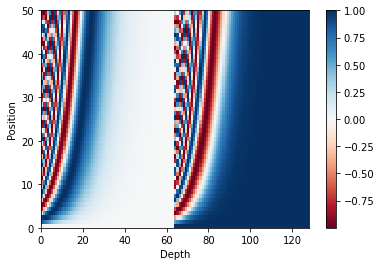

In [10]:
sample_pos_encoding = PositionalEncoding(50, 128)
# print(sample_pos_encoding.pos_encoding)
                                            # (N,T,D)
                                            # tf.shape(inputs)[1]
print(sample_pos_encoding.pos_encoding[:, :10, :])

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [11]:
query = tf.constant(np.arange(1,25).reshape(1,2,4,3),dtype=tf.float32)
print(query)

key = tf.constant(np.ones((1,2,4,3)),dtype=tf.float32)
print(key)

matmul_qk = tf.matmul(query, key, transpose_b=True)
print("matmul_qk=", matmul_qk)

tf.Tensor(
[[[[ 1.  2.  3.]
   [ 4.  5.  6.]
   [ 7.  8.  9.]
   [10. 11. 12.]]

  [[13. 14. 15.]
   [16. 17. 18.]
   [19. 20. 21.]
   [22. 23. 24.]]]], shape=(1, 2, 4, 3), dtype=float32)
tf.Tensor(
[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]], shape=(1, 2, 4, 3), dtype=float32)
matmul_qk= tf.Tensor(
[[[[ 6.  6.  6.  6.]
   [15. 15. 15. 15.]
   [24. 24. 24. 24.]
   [33. 33. 33. 33.]]

  [[42. 42. 42. 42.]
   [51. 51. 51. 51.]
   [60. 60. 60. 60.]
   [69. 69. 69. 69.]]]], shape=(1, 2, 4, 4), dtype=float32)


In [20]:
def scaled_dot_product_attention(query, key, value, mask):
    # query 크기 : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    # key 크기 : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
    # value 크기 : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
    # padding_mask : (batch_size, 1, 1, key의 문장 길이)

    # Q와 K의 곱. 어텐션 스코어 행렬.
    matmul_qk = tf.matmul(query, key, transpose_b=True) # (1,4,4,128)(1,4,128,4)
    print("matmul_qk.shape =", matmul_qk.shape)         # (1,4,4,4)
    # 스케일링
    # dk의 루트값으로 나눠준다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    print("depth=",depth)
    logits = matmul_qk / tf.math.sqrt(depth)
    print("logits=",logits)

    # 마스킹. 어텐션 스코어 행렬의 마스킹 할 위치에 매우 작은 음수값을 넣는다.
    # 매우 작은 값이므로 소프트맥스 함수를 지나면 행렬의 해당 위치의 값은 0이 된다.
    if mask is not None:
        logits += (mask * -1e9)

    # 소프트맥스 함수는 마지막 차원인 key의 문장 길이 방향으로 수행된다.
    # attention weight : (batch_size, num_heads, query의 문장 길이, key의 문장 길이)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    print("attention_weights.shape =",attention_weights.shape)  # (1,4,4,4)
    # output : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
    output = tf.matmul(attention_weights, value) # (1,4,4,4)(1,4,4,32) => (1,4,4,32)
    print("output.shape =", output.shape) 

    return output, attention_weights

In [21]:
np.set_printoptions(suppress=True)
temp_k = tf.constant([[10,0,0],
                      [0,10,0],
                      [0,0,10],
                      [0,0,10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[   1,0],
                      [  10,0],
                      [ 100,5],
                      [1000,6]], dtype=tf.float32)  # (4, 2)
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)

In [14]:
# temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

matmul_qk.shape = (1, 4)
depth= tf.Tensor(3.0, shape=(), dtype=float32)
logits= tf.Tensor([[ 0.       57.735027  0.        0.      ]], shape=(1, 4), dtype=float32)
attention_weights.shape = (1, 4)
output.shape = (1, 2)
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [15]:
temp_q = tf.constant([[0, 0, 10], [0, 10, 0], [10, 10, 0]], dtype=tf.float32)  # (3, 3)
temp_out, temp_attn = scaled_dot_product_attention(temp_q, temp_k, temp_v, None)
print(temp_attn) # 어텐션 분포(어텐션 가중치의 나열)
print(temp_out) # 어텐션 값

matmul_qk.shape = (3, 4)
depth= tf.Tensor(3.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[ 0.        0.       57.735027 57.735027]
 [ 0.       57.735027  0.        0.      ]
 [57.735027 57.735027  0.        0.      ]], shape=(3, 4), dtype=float32)
attention_weights.shape = (3, 4)
output.shape = (3, 2)
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)


In [16]:
dense1 = tf.keras.layers.Dense(4)  # weight = (?,4)  , bias = (4,)
# dir(dense1)
print(dense1.weights)
x = tf.constant([[1,2,3]])
print(x.shape)
out = dense1(x)   # (1,3)(3,4)+(4,)
print(dense1.weights)

[]
(1, 3)
[<tf.Variable 'dense/kernel:0' shape=(3, 4) dtype=float32, numpy=
array([[ 0.51615655,  0.9097786 ,  0.237715  ,  0.30533254],
       [-0.26314604,  0.87166953,  0.7337655 ,  0.6187154 ],
       [-0.84374774,  0.175565  ,  0.7219163 ,  0.28337204]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]


In [17]:
class MyLayer:
    def __call__(self):
        self.call()

class AAA(MyLayer):
    def foo(self):
        print("AAA.foo()")
        
    def call(self):
        print("AAA.call()")

aaa = AAA()
aaa.foo()
aaa()

AAA.foo()
AAA.call()


In [18]:
class MultiHeadAttention(tf.keras.layers.Layer):

    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        
        print("MultiHeadAttention.__init__()")
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        # d_model을 num_heads로 나눈 값.
        # 논문 기준 : 64
        self.depth = d_model // self.num_heads

        # WQ, WK, WV에 해당하는 밀집층 정의
        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        # WO에 해당하는 밀집층 정의
        self.dense = tf.keras.layers.Dense(units=d_model)

  # num_heads 개수만큼 q, k, v를 split하는 함수
    def split_heads(self, inputs, batch_size):
        print("split_heads()")
        print(inputs.shape)
        inputs = tf.reshape(                                             # (1,4,128)
                                                                         # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
            inputs, shape=(batch_size, -1, self.num_heads, self.depth))  # (1,4,4,32)
                                                                         # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        print(inputs.shape)                                              # (1,4,4,32)
        return tf.transpose(inputs, perm=[0, 2, 1, 3])
    
    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

        # 1. WQ, WK, WV에 해당하는 밀집층 지나기
        # q : (batch_size, query의 문장 길이, d_model)  =>  (1,4,128)
        # k : (batch_size, key의 문장 길이, d_model)
        # v : (batch_size, value의 문장 길이, d_model)
        # 참고) 인코더(k, v)-디코더(q) 어텐션에서는 query 길이와 key, value의 길이는 다를 수 있다.
        query = self.query_dense(query)    # (1,4,128)(128,128) => (1,4,128)
        key = self.key_dense(key)          # (1,4,128)(128,128) => (1,4,128)
        value = self.value_dense(value)    # (1,4,128)(128,128) => (1,4,128)
        
        print(query.shape)
        print(key.shape)
        print(value.shape)
        
#         print(query[0,0,:])
#         print(key[0,0,:])

        # 2. 헤드 나누기
        # q : (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        # k : (batch_size, num_heads, key의 문장 길이, d_model/num_heads)
        # v : (batch_size, num_heads, value의 문장 길이, d_model/num_heads)
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)
        print(query.shape)
        print(key.shape)
        print(value.shape)
        

        # 3. 스케일드 닷 프로덕트 어텐션. 앞서 구현한 함수 사용.
        # (batch_size, num_heads, query의 문장 길이, d_model/num_heads)
        scaled_attention, _ = scaled_dot_product_attention(query, key, value, mask)
        # (batch_size, query의 문장 길이, num_heads, d_model/num_heads)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        print('scaled_attention.shape=',scaled_attention.shape)
        
        # 4. 헤드 연결(concatenate)하기
        # (batch_size, query의 문장 길이, d_model)
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))
        print('concat_attention.shape=',concat_attention.shape)

        # 5. WO에 해당하는 밀집층 지나기
        # (batch_size, query의 문장 길이, d_model)
        outputs = self.dense(concat_attention)  # (1,4,128)(128,128) => (1,4,128)
        print('outputs.shape=',outputs.shape)

        return outputs

In [19]:
mha = MultiHeadAttention(128,4)
x = tf.constant(np.random.randn(1,4,128))
inputs = { 'query':x, 'key':x, 'value':x, 'mask':None }
mha(inputs)

# mha = MultiHeadAttention(128,4)({ 'query':x, 'key':x, 'value':x, 'mask':None })

MultiHeadAttention.__init__()
(1, 4, 128)
(1, 4, 128)
(1, 4, 128)
split_heads()
(1, 4, 128)
(1, 4, 4, 32)
split_heads()
(1, 4, 128)
(1, 4, 4, 32)
split_heads()
(1, 4, 128)
(1, 4, 4, 32)
(1, 4, 4, 32)
(1, 4, 4, 32)
(1, 4, 4, 32)
matmul_qk.shape = (1, 4, 4, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-0.19531368  0.50730324  0.27039167 -1.3858031 ]
   [ 2.2986631  -1.4550354  -0.09641149  1.3451545 ]
   [-0.39315796 -0.02242094 -0.1568575   1.4337155 ]
   [ 1.0246078   0.6037939  -0.6416749   0.501713  ]]

  [[ 0.2971008   0.08381696 -0.39127266  1.0877726 ]
   [ 0.8702019   1.0554622  -0.9125948  -0.66327155]
   [-0.14250788 -0.9018558   0.0725087   0.3107218 ]
   [ 0.5715079   1.0323457   1.0923291   1.8632497 ]]

  [[ 3.504584    0.5945449  -1.8455257   1.683574  ]
   [ 1.2571493  -0.5631031  -0.52757734  0.24041744]
   [ 0.46022156  1.4292681  -0.44054356  0.28061903]
   [ 1.1455792  -0.87626773  0.6716843   2.573258  ]]

  [[-1.5233837   2.0066652  -0.7

<tf.Tensor: shape=(1, 4, 128), dtype=float32, numpy=
array([[[ 0.15974349,  0.22028796,  1.2447312 , -0.05068296,
         -0.06313427, -0.13827907, -0.2859064 , -0.6557277 ,
          1.4953666 , -0.22662306, -0.78201497, -1.9229467 ,
          0.36176872,  0.3709221 ,  1.2016816 , -0.4965919 ,
          0.6330465 ,  0.10289492, -1.2938311 , -0.592535  ,
          0.67396593, -0.11888432, -1.0003039 , -0.92621154,
          0.55627143, -0.7763991 ,  1.1317078 , -0.5627951 ,
         -0.65364075, -0.02953834,  0.73539895, -1.2670269 ,
          0.40682992,  0.5532873 , -0.38615075, -0.23325631,
         -1.1747102 ,  0.01204192,  0.18304443,  1.5574468 ,
         -0.21592508, -0.22837093, -0.06877883, -1.250449  ,
          0.5665851 , -0.06801137, -0.7246217 ,  0.27300033,
          0.4910827 ,  0.24465011,  1.1951616 ,  1.4084058 ,
         -0.46858442, -0.2879332 ,  0.56235254,  1.1510066 ,
          1.1065245 ,  0.28592515,  0.80371237, -0.22829136,
          0.0658048 , -0.4109011

In [23]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32) # (2,5)
    # (batch_size, 1, 1, key의 문장 길이)
    return mask[:, tf.newaxis, tf.newaxis, :]

In [24]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0]])))  # (1,1,1,5)

tf.Tensor([[[[0. 0. 0. 1. 1.]]]], shape=(1, 1, 1, 5), dtype=float32)


In [26]:
print(create_padding_mask(tf.constant([[1, 21, 777, 0, 0],
                                       [0, 0, 777, 23, 25]])))  # (2,1,1,5)

tf.Tensor(
[[[[0. 0. 0. 1. 1.]]]


 [[[1. 1. 0. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [39]:
x = np.array([[1,450],
              [3,350],
              [2,300],
              [4,250],
              [5,100]])
mean = np.mean(x, axis=0)
print(mean)
std  = np.std(x, axis=0)
print(std)
x_scaled = (x - mean) / std   # (5,2) - (5,2)
print(x_scaled)
print(np.mean(x_scaled, axis=0))
print(np.std(x_scaled, axis=0))

gamma = 2
beta = 3
x_scaled = x_scaled*gamma + beta
print(x_scaled)
print(np.mean(x_scaled, axis=0))
print(np.std(x_scaled, axis=0))

[  3. 290.]
[  1.41421356 115.75836903]
[[-1.41421356  1.38218948]
 [ 0.          0.51832106]
 [-0.70710678  0.08638684]
 [ 0.70710678 -0.34554737]
 [ 1.41421356 -1.64135001]]
[0. 0.]
[1. 1.]
[[ 0.17157288  5.76437896]
 [ 3.          4.03664211]
 [ 1.58578644  3.17277369]
 [ 4.41421356  2.30890526]
 [ 5.82842712 -0.28270002]]
[3. 3.]
[2. 2.]


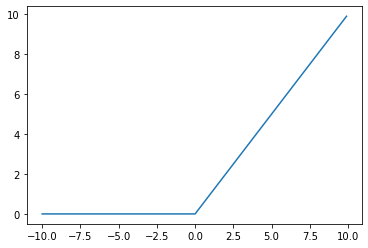

In [41]:
def relu(x):
    return np.maximum(0,x)

x = np.arange(-10, 10, 0.1)
y = relu(x)
plt.plot(x,y)
plt.show()

In [73]:
def encoder_layer(dff, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 멀티-헤드 어텐션 (첫번째 서브층 / 셀프 어텐션)
    attention = MultiHeadAttention(
        d_model, num_heads, name="attention")({
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': padding_mask # 패딩 마스크 사용
        })
    
    print('attention.shape=', attention.shape)

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    print('attention.shape=', attention.shape)
    attention = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(inputs + attention)
    
    print('attention.shape=', attention.shape)

    # 포지션 와이즈 피드 포워드 신경망 (두번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention)  # (1,4,128)(128,256)=>(1,4,256)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)  # (1,4,256)(256,128)=>(1,4,128)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [74]:
def encoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 인코더는 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 인코더를 num_layers개 쌓기
    for i in range(num_layers):
      outputs = encoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
          dropout=dropout, name="encoder_layer_{}".format(i),
      )([outputs, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [75]:
seq_len=5
print(tf.ones((seq_len, seq_len)))
print(tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0))
print(1-tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0))

tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]], shape=(5, 5), dtype=float32)
tf.Tensor(
[[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]], shape=(5, 5), dtype=float32)
tf.Tensor(
[[0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]], shape=(5, 5), dtype=float32)


In [76]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x) # 패딩 마스크도 포함
    return tf.maximum(look_ahead_mask, padding_mask)
#     return look_ahead_mask

In [77]:
print(create_look_ahead_mask(tf.constant([[4, 3, 1, 0, 0]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 1. 1.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [78]:
def decoder_layer(dff, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 멀티-헤드 어텐션 (첫번째 서브층 / 마스크드 셀프 어텐션)
    attention1 = MultiHeadAttention(
        d_model, num_heads, name="attention_1")(inputs={
            'query': inputs, 'key': inputs, 'value': inputs, # Q = K = V
            'mask': look_ahead_mask # 룩어헤드 마스크
        })

    # 잔차 연결과 층 정규화
    attention1 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention1 + inputs)

    # 멀티-헤드 어텐션 (두번째 서브층 / 디코더-인코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
            'query': attention1, 'key': enc_outputs, 'value': enc_outputs, # Q != K = V
            'mask': padding_mask # 패딩 마스크
        })

    # 드롭아웃 + 잔차 연결과 층 정규화
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

    # 포지션 와이즈 피드 포워드 신경망 (세번째 서브층)
    outputs = tf.keras.layers.Dense(units=dff, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

    # 드롭아웃 + 잔차 연결과 층 정규화
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [79]:
def decoder(vocab_size, num_layers, dff,
            d_model, num_heads, dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')

    # 디코더는 룩어헤드 마스크(첫번째 서브층)와 패딩 마스크(두번째 서브층) 둘 다 사용.
    look_ahead_mask = tf.keras.Input(
        shape=(1, None, None), name='look_ahead_mask')
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    # 포지셔널 인코딩 + 드롭아웃
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    # 디코더를 num_layers개 쌓기
    for i in range(num_layers):
        outputs = decoder_layer(dff=dff, d_model=d_model, num_heads=num_heads,
            dropout=dropout, name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)

In [80]:
def transformer(vocab_size, num_layers, dff,
                  d_model, num_heads, dropout,
                  name="transformer"):

    # 인코더의 입력
    inputs = tf.keras.Input(shape=(None,), name="inputs")

    # 디코더의 입력
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    # 인코더의 패딩 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

    # 디코더의 룩어헤드 마스크(첫번째 서브층)
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

    # 디코더의 패딩 마스크(두번째 서브층)
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

    # 인코더의 출력은 enc_outputs. 디코더로 전달된다.
    enc_outputs = encoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[inputs, enc_padding_mask]) # 인코더의 입력은 입력 문장과 패딩 마스크

    # 디코더의 출력은 dec_outputs. 출력층으로 전달된다.
    dec_outputs = decoder(vocab_size=vocab_size, num_layers=num_layers, dff=dff,
        d_model=d_model, num_heads=num_heads, dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    # 다음 단어 예측을 위한 출력층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

MultiHeadAttention.__init__()
(None, None, 128)
(None, None, 128)
(None, None, 128)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
(None, 4, None, 32)
(None, 4, None, 32)
(None, 4, None, 32)
matmul_qk.shape = (None, 4, None, None)
depth= Tensor("attention/Cast:0", shape=(), dtype=float32)
logits= Tensor("attention/truediv:0", shape=(None, 4, None, None), dtype=float32)
attention_weights.shape = (None, 4, None, None)
output.shape = (None, 4, None, 32)
scaled_attention.shape= (None, None, 4, 32)
concat_attention.shape= (None, None, 128)
outputs.shape= (None, None, 128)
attention.shape= (None, None, 128)
attention.shape= (None, None, 128)
attention.shape= (None, None, 128)
(None, None, 128)
(None, None, 128)
(None, None, 128)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
(N

(None, None, 128)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
(None, 4, None, 32)
(None, 4, None, 32)
(None, 4, None, 32)
matmul_qk.shape = (None, 4, None, None)
depth= Tensor("decoder_layer_0/attention_1/Cast:0", shape=(), dtype=float32)
logits= Tensor("decoder_layer_0/attention_1/truediv:0", shape=(None, 4, None, None), dtype=float32)
attention_weights.shape = (None, 4, None, None)
output.shape = (None, 4, None, 32)
scaled_attention.shape= (None, None, 4, 32)
concat_attention.shape= (None, None, 128)
outputs.shape= (None, None, 128)
(None, None, 128)
(None, None, 128)
(None, None, 128)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
(None, 4, None, 32)
(None, 4, None, 32)
(None, 4, None, 32)
matmul_qk.shape = (None, 4, None, None)
depth= Tensor("decoder_layer_0/attent

(None, None, 128)
(None, None, 128)
(None, None, 128)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
(None, 4, None, 32)
(None, 4, None, 32)
(None, 4, None, 32)
matmul_qk.shape = (None, 4, None, None)
depth= Tensor("decoder_layer_3/attention_1/Cast:0", shape=(), dtype=float32)
logits= Tensor("decoder_layer_3/attention_1/truediv:0", shape=(None, 4, None, None), dtype=float32)
attention_weights.shape = (None, 4, None, None)
output.shape = (None, 4, None, 32)
scaled_attention.shape= (None, None, 4, 32)
concat_attention.shape= (None, None, 128)
outputs.shape= (None, None, 128)
(None, None, 128)
(None, None, 128)
(None, None, 128)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
split_heads()
(None, None, 128)
(None, None, 4, 32)
(None, 4, None, 32)
(None, 4, None, 32)
(None, 4, None, 32)
matmul_qk.shape = (None, 4, None, None)
d

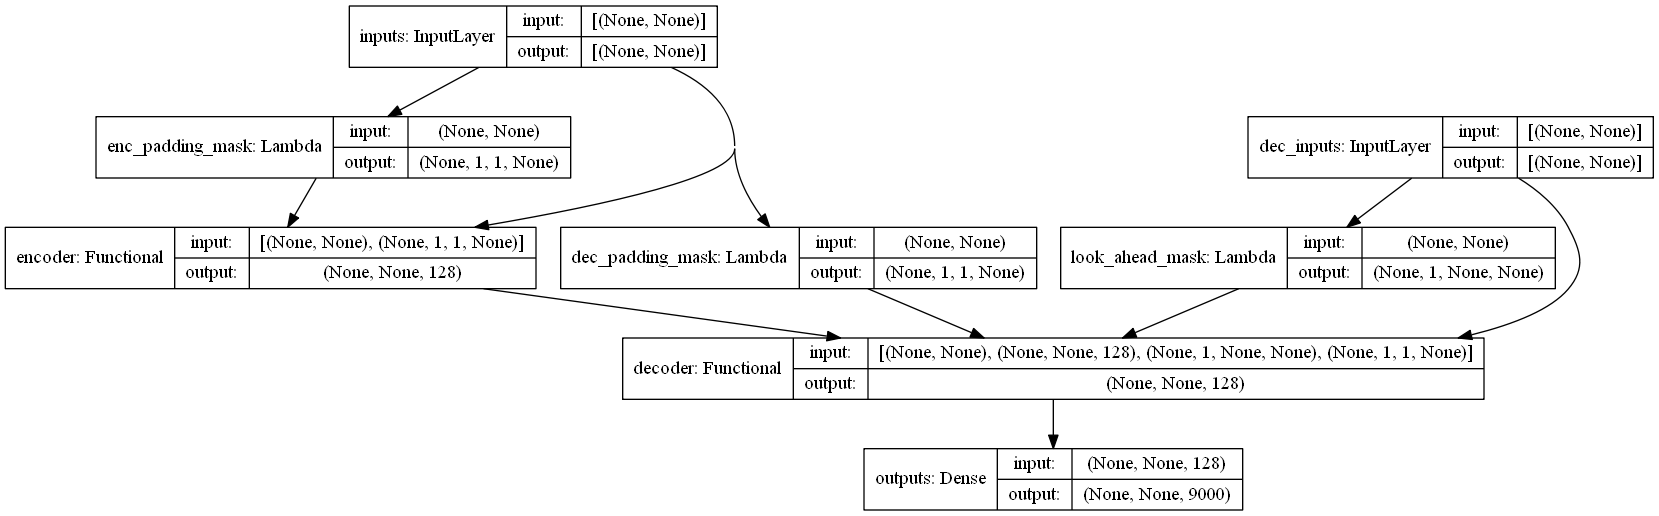

In [81]:
small_transformer = transformer(
    vocab_size = 9000,
    num_layers = 4,
    dff = 512,
    d_model = 128,
    num_heads = 4,
    dropout = 0.3,
    name="small_transformer")

tf.keras.utils.plot_model(
    small_transformer, to_file='small_transformer.png', show_shapes=True)

In [82]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

Text(0.5, 0, 'Train Step')

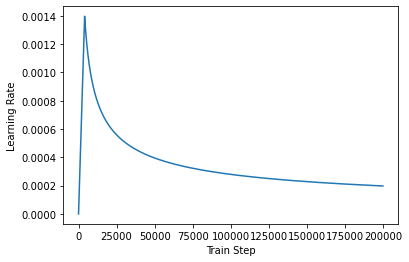

In [83]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()
        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")
# Text(0.5, 0, 'Train Step')

#### tensorflow_datasets 처음 설치 시

In [84]:
!pip install tensorflow_datasets 

#### tensorflow_datasets 업그레이드 시

In [85]:
!pip3 install --user --upgrade tensorflow_datasets

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import time
import tensorflow_datasets as tfds
import tensorflow as tf

In [87]:
print(tf.__version__)

2.4.0


In [88]:
print(tfds.__version__)

4.4.0+nightly


In [90]:
# urllib.request.urlretrieve("https://raw.githubusercontent.com/songys/Chatbot_data/master/ChatbotData%20.csv", filename="ChatBotData.csv")
train_data = pd.read_csv('ChatBotData.csv')
train_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [91]:
print('챗봇 샘플의 개수 :', len(train_data))

챗봇 샘플의 개수 : 11823


In [92]:
print(train_data.isnull().sum())

Q        0
A        0
label    0
dtype: int64


In [94]:
questions = []
for sentence in train_data['Q']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    questions.append(sentence)
answers = []
for sentence in train_data['A']:
    # 구두점에 대해서 띄어쓰기
    # ex) 12시 땡! -> 12시 땡 !
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = sentence.strip()
    answers.append(sentence)

In [95]:
print(questions[:5])
print(answers[:5])

['12시 땡 !', '1지망 학교 떨어졌어', '3박4일 놀러가고 싶다', '3박4일 정도 놀러가고 싶다', 'PPL 심하네']
['하루가 또 가네요 .', '위로해 드립니다 .', '여행은 언제나 좋죠 .', '여행은 언제나 좋죠 .', '눈살이 찌푸려지죠 .']


In [96]:
# 서브워드텍스트인코더를 사용하여 질문, 답변 데이터로부터 단어 집합(Vocabulary) 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

In [97]:
# 시작 토큰과 종료 토큰에 대한 정수 부여.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# 시작 토큰과 종료 토큰을 고려하여 단어 집합의 크기를 + 2
VOCAB_SIZE = tokenizer.vocab_size + 2

In [98]:
print('시작 토큰 번호 :',START_TOKEN)
print('종료 토큰 번호 :',END_TOKEN)
print('단어 집합의 크기 :',VOCAB_SIZE)

시작 토큰 번호 : [8178]
종료 토큰 번호 : [8179]
단어 집합의 크기 : 8180


In [99]:
# 서브워드텍스트인코더 토크나이저의 .encode()를 사용하여 텍스트 시퀀스를 정수 시퀀스로 변환.
print('임의의 질문 샘플을 정수 인코딩 : {}'.format(tokenizer.encode(questions[20])))

임의의 질문 샘플을 정수 인코딩 : [5766, 611, 3509, 141, 685, 3747, 849]


In [100]:
# 서브워드텍스트인코더 토크나이저의 .encode()와 .decode() 테스트해보기
# 임의의 입력 문장을 sample_string에 저장
sample_string = questions[20]

# encode() : 텍스트 시퀀스 --> 정수 시퀀스
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# decode() : 정수 시퀀스 --> 텍스트 시퀀스
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

정수 인코딩 후의 문장 [5766, 611, 3509, 141, 685, 3747, 849]
기존 문장: 가스비 비싼데 감기 걸리겠어


In [102]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

5766 ----> 가스
611 ----> 비 
3509 ----> 비싼
141 ----> 데 
685 ----> 감기 
3747 ----> 걸리
849 ----> 겠어


In [103]:
# 최대 길이를 40으로 정의
MAX_LENGTH = 40

# 토큰화 / 정수 인코딩 / 시작 토큰과 종료 토큰 추가 / 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []

  for (sentence1, sentence2) in zip(inputs, outputs):
    # encode(토큰화 + 정수 인코딩), 시작 토큰과 종료 토큰 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    tokenized_inputs.append(sentence1)
    tokenized_outputs.append(sentence2)

  # 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')

  return tokenized_inputs, tokenized_outputs
questions, answers = tokenize_and_filter(questions, answers)

In [104]:
print('질문 데이터의 크기(shape) :', questions.shape)
print('답변 데이터의 크기(shape) :', answers.shape)

질문 데이터의 크기(shape) : (11823, 40)
답변 데이터의 크기(shape) : (11823, 40)


In [105]:
print(questions[0])
print(answers[0])

[8178 7915 4207 3060   41 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


In [106]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더의 실제값 시퀀스에서는 시작 토큰을 제거해야 한다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1] # 디코더의 입력. 마지막 패딩 토큰이 제거된다.
    },
    {
        'outputs': answers[:, 1:]  # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다.
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
# 임의의 샘플에 대해서 [:, :-1]과 [:, 1:]이 어떤 의미를 가지는지 테스트해본다.
print(answers[0]) # 기존 샘플
print(answers[:1][:, :-1]) # 마지막 패딩 토큰 제거하면서 길이가 39가 된다.
print(answers[:1][:, 1:]) # 맨 처음 토큰이 제거된다. 다시 말해 시작 토큰이 제거된다. 길이는 역시 39가 된다.

[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
[[8178 3844   74 7894    1 8179    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]
[[3844   74 7894    1 8179    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


In [107]:
D_MODEL = 256
NUM_LAYERS = 2
NUM_HEADS = 8
DFF = 512
DROPOUT = 0.1

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    dff=DFF,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

MultiHeadAttention.__init__()
(None, None, 256)
(None, None, 256)
(None, None, 256)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
(None, 8, None, 32)
(None, 8, None, 32)
(None, 8, None, 32)
matmul_qk.shape = (None, 8, None, None)
depth= Tensor("attention/Cast:0", shape=(), dtype=float32)
logits= Tensor("attention/truediv:0", shape=(None, 8, None, None), dtype=float32)
attention_weights.shape = (None, 8, None, None)
output.shape = (None, 8, None, 32)
scaled_attention.shape= (None, None, 8, 32)
concat_attention.shape= (None, None, 256)
outputs.shape= (None, None, 256)
attention.shape= (None, None, 256)
attention.shape= (None, None, 256)
attention.shape= (None, None, 256)
(None, None, 256)
(None, None, 256)
(None, None, 256)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
(N

(None, None, 256)
(None, None, 256)
(None, None, 256)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
(None, 8, None, 32)
(None, 8, None, 32)
(None, 8, None, 32)
matmul_qk.shape = (None, 8, None, None)
depth= Tensor("decoder_layer_1/attention_1/Cast:0", shape=(), dtype=float32)
logits= Tensor("decoder_layer_1/attention_1/truediv:0", shape=(None, 8, None, None), dtype=float32)
attention_weights.shape = (None, 8, None, None)
output.shape = (None, 8, None, 32)
scaled_attention.shape= (None, None, 8, 32)
concat_attention.shape= (None, None, 256)
outputs.shape= (None, None, 256)
(None, None, 256)
(None, None, 256)
(None, None, 256)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
split_heads()
(None, None, 256)
(None, None, 8, 32)
(None, 8, None, 32)
(None, 8, None, 32)
(None, 8, None, 32)
matmul_qk.shape = (None, 8, None, None)
d

In [108]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  # 레이블의 크기는 (batch_size, MAX_LENGTH - 1)
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

In [109]:
EPOCHS = 50
model.fit(dataset, epochs=EPOCHS)

Epoch 1/50
(None, 40, 256)
(None, 40, 256)
(None, 40, 256)
split_heads()
(None, 40, 256)
(None, None, 8, 32)
split_heads()
(None, 40, 256)
(None, None, 8, 32)
split_heads()
(None, 40, 256)
(None, None, 8, 32)
(None, 8, None, 32)
(None, 8, None, 32)
(None, 8, None, 32)
matmul_qk.shape = (None, 8, None, None)
depth= Tensor("transformer/encoder/encoder_layer_0/attention/Cast:0", shape=(), dtype=float32)
logits= Tensor("transformer/encoder/encoder_layer_0/attention/truediv:0", shape=(None, 8, None, None), dtype=float32)
attention_weights.shape = (None, 8, None, 40)
output.shape = (None, 8, None, 32)
scaled_attention.shape= (None, None, 8, 32)
concat_attention.shape= (None, None, 256)
outputs.shape= (None, None, 256)
(None, 40, 256)
(None, 40, 256)
(None, 40, 256)
split_heads()
(None, 40, 256)
(None, None, 8, 32)
split_heads()
(None, 40, 256)
(None, None, 8, 32)
split_heads()
(None, 40, 256)
(None, None, 8, 32)
(None, 8, None, 32)
(None, 8, None, 32)
(None, 8, None, 32)
matmul_qk.shape = (N

185/185 [==============================] - 28s 134ms/step - loss: 1.5272 - accuracy: 0.0138
Epoch 2/50
185/185 [==============================] - 24s 131ms/step - loss: 1.2470 - accuracy: 0.0494
Epoch 3/50
185/185 [==============================] - 24s 130ms/step - loss: 1.0193 - accuracy: 0.0503
Epoch 4/50
185/185 [==============================] - 24s 132ms/step - loss: 0.9398 - accuracy: 0.0536
Epoch 5/50
185/185 [==============================] - 14s 73ms/step - loss: 0.8821 - accuracy: 0.0568
Epoch 6/50
185/185 [==============================] - 12s 63ms/step - loss: 0.8180 - accuracy: 0.0609
Epoch 7/50
185/185 [==============================] - 11s 59ms/step - loss: 0.7534 - accuracy: 0.0666
Epoch 8/50
185/185 [==============================] - 11s 59ms/step - loss: 0.6770 - accuracy: 0.0748
Epoch 9/50
185/185 [==============================] - 11s 61ms/step - loss: 0.5956 - accuracy: 0.0835
Epoch 10/50
185/185 [==============================] - 15s 84ms/step - loss: 0.5165 - acc

In [110]:
def evaluate(sentence):
  sentence = preprocess_sentence(sentence)

  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  output = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 예측 시작
  for i in range(MAX_LENGTH):
    predictions = model(inputs=[sentence, output], training=False)

    # 현재(마지막) 시점의 예측 단어를 받아온다.
    predictions = predictions[:, -1:, :]
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 마지막 시점의 예측 단어가 종료 토큰이라면 예측을 중단
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 마지막 시점의 예측 단어를 출력에 연결한다.
    # 이는 for문을 통해서 디코더의 입력으로 사용될 예정이다.
    output = tf.concat([output, predicted_id], axis=-1)

  return tf.squeeze(output, axis=0)
def predict(sentence):
  prediction = evaluate(sentence)

  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('Input: {}'.format(sentence))
  print('Output: {}'.format(predicted_sentence))

  return predicted_sentence
def preprocess_sentence(sentence):
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = sentence.strip()
  return sentence

In [111]:
output = predict("날씨가 좋넹.")

(1, 8, 256)
(1, 8, 256)
(1, 8, 256)
split_heads()
(1, 8, 256)
(1, 8, 8, 32)
split_heads()
(1, 8, 256)
(1, 8, 8, 32)
split_heads()
(1, 8, 256)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
matmul_qk.shape = (1, 8, 8, 8)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -3.5907724    3.119958     0.8104701   -3.7867832   -0.53479564
     -0.68400717  -2.684907    -4.306619  ]
   [ -2.3828275    6.9414687    0.72609663  -5.475966    -3.1419044
     -4.861004    -1.5760975   -1.7812909 ]
   [ -9.4575205    9.2924795   -0.14664039  -7.7748985    0.3141518
     -4.7069764   -3.4037216   -7.8661847 ]
   [-10.166894    14.483014     3.299315   -11.655867    -6.542652
     -5.2036433   -7.0711117   -9.239806  ]
   [ -7.9254494   12.0516       3.657774   -14.190444    -6.1069603
     -6.00821     -5.337775    -6.7280397 ]
   [ -9.514821    12.602872     2.7181993  -11.5606165   -3.807155
     -4.5184774   -7.4839892   -9.5418    ]
   [ -6.294987     8.895258     0

(1, 3, 8, 32)
split_heads()
(1, 3, 256)
(1, 3, 8, 32)
split_heads()
(1, 3, 256)
(1, 3, 8, 32)
(1, 8, 3, 32)
(1, 8, 3, 32)
(1, 8, 3, 32)
matmul_qk.shape = (1, 8, 3, 3)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-0.1967106   0.09299298  0.60130334]
   [-0.18269673 -4.40855     0.07642998]
   [-0.11618186  3.2863328  -3.025875  ]]

  [[-0.1123142   0.56263393  0.21921782]
   [-0.29892173 -1.5473536   1.286812  ]
   [-0.25255403  2.1486242  -6.0938    ]]

  [[-0.10918517  0.11000926  0.21102953]
   [ 0.07259987 -4.5046606  -4.6542673 ]
   [-0.0773119  -0.45317498  3.3376467 ]]

  [[-0.22114104 -0.48759893  0.03473653]
   [ 0.67009145 -7.431193   -0.8688647 ]
   [-0.6334822   2.1947665  -1.3594295 ]]

  [[ 0.00076126  0.07451362  0.17366233]
   [-0.10380323 -2.2713957  -1.0344037 ]
   [ 0.00120817 -2.261606   -4.7580304 ]]

  [[-0.00999826  0.21593446 -0.3890052 ]
   [ 0.9415558  -2.968748   -1.1732452 ]
   [-0.03670223 -0.73637694  3.4228125 ]]

  [[-0.20863976 

(1, 8, 8, 32)
split_heads()
(1, 8, 256)
(1, 8, 8, 32)
split_heads()
(1, 8, 256)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
(1, 8, 8, 32)
matmul_qk.shape = (1, 8, 8, 8)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -3.5907724    3.119958     0.8104701   -3.7867832   -0.53479564
     -0.68400717  -2.684907    -4.306619  ]
   [ -2.3828275    6.9414687    0.72609663  -5.475966    -3.1419044
     -4.861004    -1.5760975   -1.7812909 ]
   [ -9.4575205    9.2924795   -0.14664039  -7.7748985    0.3141518
     -4.7069764   -3.4037216   -7.8661847 ]
   [-10.166894    14.483014     3.299315   -11.655867    -6.542652
     -5.2036433   -7.0711117   -9.239806  ]
   [ -7.9254494   12.0516       3.657774   -14.190444    -6.1069603
     -6.00821     -5.337775    -6.7280397 ]
   [ -9.514821    12.602872     2.7181993  -11.5606165   -3.807155
     -4.5184774   -7.4839892   -9.5418    ]
   [ -6.294987     8.895258     0.31260866  -7.041161    -2.2837403
     -4.8525386   -4.434692

In [112]:
output = predict("고민이 있어")

(1, 4, 256)
(1, 4, 256)
(1, 4, 256)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
matmul_qk.shape = (1, 8, 4, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-3.5907724   2.3561337   1.5915804  -4.1808095 ]
   [-5.6385536   4.4107776   0.17257608 -6.9278107 ]
   [-5.6089234   0.5278147  -3.2366285  -6.488331  ]
   [-2.6520565   3.2424057   4.5023174  -3.7211149 ]]

  [[-5.830585    2.2785926   0.21166308 -5.8514013 ]
   [-1.1092676  -0.18028086 -1.7366805  -0.6944961 ]
   [-6.485458    0.20626803 -7.206355   -6.201642  ]
   [-3.889495    3.7722502   1.8531445  -3.5668743 ]]

  [[ 0.21261294  2.6389184   1.8771871  -1.4663465 ]
   [-6.229604    3.4806194   4.151268   -5.901417  ]
   [-2.453914    2.6220567  -0.153227   -3.2771468 ]
   [-3.4774246   5.043724    1.335897   -3.6499627 ]]

  [[-0.62310183 -0.14562775  1.278508   -1.0099144 ]
   [-5.37

(1, 3, 256)
(1, 3, 8, 32)
split_heads()
(1, 3, 256)
(1, 3, 8, 32)
split_heads()
(1, 3, 256)
(1, 3, 8, 32)
(1, 8, 3, 32)
(1, 8, 3, 32)
(1, 8, 3, 32)
matmul_qk.shape = (1, 8, 3, 3)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-0.7393344  -0.01664181 -0.6147039 ]
   [ 3.96568    -0.17723085  1.5590783 ]
   [ 3.9833748  -2.2539997   0.15140963]]

  [[-0.16619189 -0.5680489  -0.22415894]
   [ 0.22428446 -2.402899   -1.7699208 ]
   [-0.6712342   0.30168235 -3.0742364 ]]

  [[-3.0174336   0.41961712  1.9252456 ]
   [-1.3549727  -0.09280814  2.5851169 ]
   [-1.7961591  -1.8925554  -0.41655225]]

  [[-3.0523906   1.8179893   4.253165  ]
   [-7.7598214  -1.2395704   4.424106  ]
   [-5.33444    -2.9674113   1.9738437 ]]

  [[-0.6331823  -1.2349904   0.17108005]
   [ 2.119253   -4.246382    1.0599287 ]
   [-1.1188248   0.14757451  1.0110303 ]]

  [[-1.2599558   1.0058122   0.9403136 ]
   [ 1.9198732  -0.84344107  2.0494642 ]
   [ 2.8428354  -1.6724693  -1.4574461 ]]

  [[

(1, 6, 8, 32)
split_heads()
(1, 6, 256)
(1, 6, 8, 32)
split_heads()
(1, 6, 256)
(1, 6, 8, 32)
(1, 8, 6, 32)
(1, 8, 6, 32)
(1, 8, 6, 32)
matmul_qk.shape = (1, 8, 6, 6)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -0.1967106    0.34484416   0.3515555    0.8269838   -0.1325054
      1.1541476 ]
   [ -1.5524524    0.57553977   1.342203     0.7264702    0.67869383
     -2.3639412 ]
   [  0.17656448  -2.1603198   -3.1747456   -2.3878162   -0.21427149
     -2.5600047 ]
   [ -0.27855322  -2.3594024    0.28350914  -6.3847156    2.1768348
      0.48724338]
   [ -0.5387738   -1.1847006   -2.5186715    3.639655    -2.1242177
      8.928502  ]
   [ -0.30547413  -1.4707135    0.06941595   0.72953105   1.0991143
      2.2755632 ]]

  [[ -0.1123142    0.09086403  -0.2228786   -0.18202324   0.14455257
     -0.04013486]
   [ -0.27778682  -7.685327    -0.20150177   3.3823       3.8902612
      4.337893  ]
   [  0.30459622  -1.6710656   -3.094567    -1.6013079    0.79777056
    

(1, 9, 8, 32)
split_heads()
(1, 9, 256)
(1, 9, 8, 32)
split_heads()
(1, 9, 256)
(1, 9, 8, 32)
(1, 8, 9, 32)
(1, 8, 9, 32)
(1, 8, 9, 32)
matmul_qk.shape = (1, 8, 9, 9)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -0.1967106    0.34484416   0.3515555    0.8269838   -0.1325054
      1.1541476    0.36659813   0.6267392    0.7029531 ]
   [ -1.5524524    0.57553977   1.342203     0.7264702    0.67869383
     -2.3639412    0.21526393  -1.575456     4.0412474 ]
   [  0.17656448  -2.1603198   -3.1747456   -2.3878162   -0.21427149
     -2.5600047   -1.3389277    0.00445623  -1.037421  ]
   [ -0.27855322  -2.3594024    0.28350914  -6.3847156    2.1768348
      0.48724338   4.0435467    0.8452997    2.298873  ]
   [ -0.5387738   -1.1847006   -2.5186715    3.639655    -2.1242177
      8.928502     3.1669946    5.1829453    4.105474  ]
   [ -0.30547413  -1.4707135    0.06941595   0.72953105   1.0991143
      2.2755632    3.7240849    3.374271     3.1669166 ]
   [ -0.070214

output.shape = (1, 8, 11, 32)
scaled_attention.shape= (1, 11, 8, 32)
concat_attention.shape= (1, 11, 256)
outputs.shape= (1, 11, 256)
(1, 11, 256)
(1, 4, 256)
(1, 4, 256)
split_heads()
(1, 11, 256)
(1, 11, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
(1, 8, 11, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
matmul_qk.shape = (1, 8, 11, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -0.5176607    1.9687198    2.0989769   -0.47190297]
   [ -0.49124843   0.08534324   0.2991765   -0.48528743]
   [  0.24215932  -4.697081    -4.019181     0.1927161 ]
   [  0.7396501   -3.0292149   -2.48159      0.7256521 ]
   [  0.7377838   -1.2575825   -1.0456651    0.7396505 ]
   [  0.12743154  -2.1013763   -1.7714081    0.15186152]
   [  0.57692707  -1.6948001   -1.6039941    0.56792045]
   [ -0.0456275   -3.2555232   -2.8839726   -0.07279108]
   [  0.541922    -4.2346587   -4.088871     0.5205673 ]
   [  0.43123668  -4.4550576   -4.342825     0.38334

depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[  1.7591333    5.0243936    3.5544546    2.6399336 ]
   [ -4.253851     0.84035844  -0.21777306  -4.804449  ]
   [ -0.15435873   0.5058999    0.47399068  -0.29995087]
   [  0.6791757    3.8417208    2.8333614    1.484463  ]]

  [[ -1.2329528    1.6295599   -0.7721219   -2.603114  ]
   [ -4.3549094    2.46123      2.5575788   -4.4672627 ]
   [ -7.321539     1.1913186    0.96821874  -6.5926433 ]
   [ -3.4320796    1.4416587   -1.4664403   -4.591977  ]]

  [[ -2.825953     9.073873     5.4353266   -1.9312263 ]
   [ -4.668066     1.9637846    0.55493575  -3.1404896 ]
   [ -7.8387685    3.1339467    1.06559     -6.1151247 ]
   [ -4.6222258    9.124773     5.114823    -3.1526585 ]]

  [[  1.819402     0.35315254  -0.21079886   2.736524  ]
   [ -9.943851     1.7468896   -1.9401404   -9.102351  ]
   [ -7.2699304    2.3089426   -1.2441256   -6.761486  ]
   [  0.356722     0.01084253  -0.7567232    1.265906  ]]

  [[ 10.83249

depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-0.7393344  -0.01664181 -0.6147039  ...  1.229891    0.10202239
     0.32850313]
   [ 3.96568    -0.17723085  1.5590783  ... -6.952222    3.4967818
    -7.245028  ]
   [ 3.9833748  -2.2539997   0.15140963 ... -1.7606908   0.5195799
    -0.7914744 ]
   ...
   [ 1.616248   -0.41301975  2.1102164  ... -3.1939867   1.1761485
    -1.2679567 ]
   [ 4.979084   -2.5243933   1.1940266  ... -7.0161867  -2.0503643
    -0.09240808]
   [-2.7081084  -3.6974242  -3.8014445  ...  5.7798724  -0.5665495
    12.004004  ]]

  [[-0.16619189 -0.5680489  -0.22415894 ... -1.5257807   0.43077925
     0.3584118 ]
   [ 0.22428446 -2.402899   -1.7699208  ... -0.9432326  -0.39453703
     1.669495  ]
   [-0.6712342   0.30168235 -3.0742364  ... -3.5610971  -1.3580014
     0.11397357]
   ...
   [-1.4047577  -1.0068825   0.7469123  ...  2.0891628   0.02782362
     2.4152231 ]
   [-0.8975079  -0.94379324  1.5547016  ...  1.8971337  -2.2477436
     2

In [113]:
output = predict("너무 화가나")

(1, 4, 256)
(1, 4, 256)
(1, 4, 256)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
matmul_qk.shape = (1, 8, 4, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -3.5907724   -0.7859426    1.8895346   -4.1808095 ]
   [  3.1438417   -2.3516042   -2.567732     3.3101664 ]
   [ -6.821511     5.132966    -1.515522    -8.113494  ]
   [ -2.6520565    0.29321504   2.1502676   -3.7211149 ]]

  [[ -5.830585    -3.796887     3.4242606   -5.8514013 ]
   [ -4.592556     0.16063029   2.767142    -4.5720806 ]
   [ -3.28553     -1.1929119    0.7792256   -3.4044573 ]
   [ -3.889495    -2.520736     2.122136    -3.5668743 ]]

  [[  0.21261294  -2.0974307    1.9989094   -1.4663465 ]
   [ -8.633069    -8.325801    -1.5773704  -10.09647   ]
   [ -8.450605    -4.192688     1.4179147   -7.872258  ]
   [ -3.4774246   -1.0960379    2.3552895   -3.6499627 ]]

  [[ -0.623101

concat_attention.shape= (1, 4, 256)
outputs.shape= (1, 4, 256)
(1, 4, 256)
(1, 4, 256)
(1, 4, 256)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
matmul_qk.shape = (1, 8, 4, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -3.3626041   -3.6032155    4.161095     0.0656366 ]
   [ -6.182477    -2.5122466    7.009508    -3.584936  ]
   [ -3.4696164    1.1780642    5.1291347   -2.1059198 ]
   [ -3.483398    -4.1618204    4.4601355   -0.07843098]]

  [[  0.510499     1.036337    -1.0375209    0.28767318]
   [ -3.3273916   -0.11347406   3.4049916   -3.419848  ]
   [ -4.9530396    0.3851128    4.3673553   -5.12493   ]
   [ -2.7946234    0.38115668  -0.20627333  -2.9363682 ]]

  [[ -9.042869    -3.423595    -4.7580905   -7.272155  ]
   [ -5.3064766   -1.7224908   -1.1489992   -3.3164253 ]
   [ -5.864008     1.9313622    5.1383986   -4.273402  ]
   [-10.07

attention_weights.shape = (1, 8, 6, 4)
output.shape = (1, 8, 6, 32)
scaled_attention.shape= (1, 6, 8, 32)
concat_attention.shape= (1, 6, 256)
outputs.shape= (1, 6, 256)
(1, 4, 256)
(1, 4, 256)
(1, 4, 256)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
matmul_qk.shape = (1, 8, 4, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -3.5907724   -0.7859426    1.8895346   -4.1808095 ]
   [  3.1438417   -2.3516042   -2.567732     3.3101664 ]
   [ -6.821511     5.132966    -1.515522    -8.113494  ]
   [ -2.6520565    0.29321504   2.1502676   -3.7211149 ]]

  [[ -5.830585    -3.796887     3.4242606   -5.8514013 ]
   [ -4.592556     0.16063029   2.767142    -4.5720806 ]
   [ -3.28553     -1.1929119    0.7792256   -3.4044573 ]
   [ -3.889495    -2.520736     2.122136    -3.5668743 ]]

  [[  0.21261294  -2.0974307    1.9989094   -1.4663465 ]
   [ -8.633069    

In [114]:
output = predict("카페갈래?")

(1, 6, 256)
(1, 6, 256)
(1, 6, 256)
split_heads()
(1, 6, 256)
(1, 6, 8, 32)
split_heads()
(1, 6, 256)
(1, 6, 8, 32)
split_heads()
(1, 6, 256)
(1, 6, 8, 32)
(1, 8, 6, 32)
(1, 8, 6, 32)
(1, 8, 6, 32)
matmul_qk.shape = (1, 8, 6, 6)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -3.5907724    5.2739615    0.44445598   0.6199022   -1.8606094
     -5.4542537 ]
   [ -2.6434557    0.7762684   -0.8715434   -2.1795447   -3.9540012
     -4.6782713 ]
   [ -6.1793337    5.196875     0.9097851   -2.007469    -3.7270458
     -8.857345  ]
   [ -5.1220007    6.1545386   -1.5864905   -0.9809261   -1.6544849
     -6.897224  ]
   [ -2.9175513    4.668971     1.8842993   -1.2460753   -3.9725554
     -4.511021  ]
   [ -3.92207      5.6859646   -0.5558028   -1.2563441   -1.7261751
     -6.1812677 ]]

  [[ -5.830585     6.4584546    1.6885545   -2.9425578   -2.1129007
     -4.4590826 ]
   [ -1.4542547    0.66857773  -0.8920885    3.2392426    0.6499656
     -0.78637475]
   [ -0.770013

(1, 6, 8, 32)
(1, 8, 3, 32)
(1, 8, 6, 32)
(1, 8, 6, 32)
matmul_qk.shape = (1, 8, 3, 6)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[  0.55216384  -3.8232827   -2.910573    -3.5972157   -1.0817922
      0.5912545 ]
   [  0.6380123    1.8036875    1.6386297    2.195628     2.0554762
      0.64612067]
   [  0.56770134  -2.2716873   -2.5307856   -3.5080245   -2.9300187
      0.5614793 ]]

  [[  1.3908786   -1.9680318   -2.4739487   -2.0419824   -1.1162156
      1.3957309 ]
   [  0.02316882   1.4757677    1.3413774    0.54396117  -0.06397482
      0.01687552]
   [  0.33217046  -2.1242876   -1.7803466   -2.0098727   -1.3619229
      0.3444393 ]]

  [[ -0.8532795   -1.1699389   -0.5007857   -0.49849874  -1.1035897
     -0.8753896 ]
   [  0.47264126  -5.680002    -4.517802    -4.377047    -2.9761038
      0.4754463 ]
   [  1.8673078  -13.079067   -11.496453   -10.314076    -6.891684
      1.8901012 ]]

  [[ -0.54138374  -3.166048    -2.7694507   -3.96975     -4.537139

In [115]:
output = predict("게임하고싶당")

(1, 5, 256)
(1, 5, 256)
(1, 5, 256)
split_heads()
(1, 5, 256)
(1, 5, 8, 32)
split_heads()
(1, 5, 256)
(1, 5, 8, 32)
split_heads()
(1, 5, 256)
(1, 5, 8, 32)
(1, 8, 5, 32)
(1, 8, 5, 32)
(1, 8, 5, 32)
matmul_qk.shape = (1, 8, 5, 5)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[ -3.5907724    3.5742848    4.0014167    0.3584842   -5.1269584 ]
   [ -7.0726357    5.2153454    6.938354    -1.7308213   -9.474955  ]
   [ -7.1526933    4.843132     4.2553306   -3.2136602  -10.090375  ]
   [ -8.575991     2.398785     1.2554718   -5.392389    -9.322704  ]
   [ -3.6484919    3.9418418    3.6611433    0.27454314  -5.605791  ]]

  [[ -5.830585     4.0801115    6.8558397   -0.5618447   -5.069552  ]
   [ -6.897297     0.31018955   4.668527    -1.2827225   -5.960391  ]
   [ -1.8013436    0.57899565   2.3852823   -0.6738316   -1.3032598 ]
   [ -5.3323307    0.02326641   3.5747292   -2.1570039   -4.4026885 ]
   [ -3.74596      3.2779086    5.4336576    0.17002271  -2.9562624 ]]



depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-0.7983999   0.44223335 -0.7938965 ]
   [-3.6629524   9.147647    4.6191163 ]
   [ 3.7037299  -0.4735921  -0.9723647 ]]

  [[-0.15824749  0.4709822   2.0054326 ]
   [-1.3495775   1.082988    1.9059572 ]
   [ 0.78809536  0.78308237  1.2840126 ]]

  [[-3.11453    -0.566625    2.1476986 ]
   [-2.2823813  -1.9889657   0.4346674 ]
   [ 0.18850498 -1.9162387   7.6928477 ]]

  [[-3.088554    0.33684313  2.0133615 ]
   [-2.4640126   0.49281952  1.0701021 ]
   [-0.03423405  0.50429946  3.213768  ]]

  [[-0.696059   -0.8078529   1.0818917 ]
   [ 1.132871    1.506294   -1.5998688 ]
   [ 1.9528512   1.8914231  -1.5582881 ]]

  [[-1.4883428   0.27744588  0.18821557]
   [-1.8928543   4.774709    0.6223393 ]
   [ 1.1962873   0.06909335 -2.540665  ]]

  [[-2.6267488   1.5878271   2.2988904 ]
   [-1.3783387  -0.18541397  1.179133  ]
   [ 3.513745   -4.8112173  -3.9981768 ]]

  [[-1.970584   -0.5466678   0.82418245]
   [-0.6295914  -

In [116]:
output = predict("게임하자")

(1, 4, 256)
(1, 4, 256)
(1, 4, 256)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
split_heads()
(1, 4, 256)
(1, 4, 8, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
(1, 8, 4, 32)
matmul_qk.shape = (1, 8, 4, 4)
depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-3.5907724   3.5742848   0.47916737 -4.1808095 ]
   [-7.0726357   5.2153454  -0.6191547  -7.686931  ]
   [-5.0196514   3.5095148   0.26564068 -4.7125306 ]
   [-2.6520565   4.155355    1.5553874  -3.7211149 ]]

  [[-5.830585    4.0801115  -0.8106586  -5.8514013 ]
   [-6.897297    0.31018955  3.5017562  -6.787184  ]
   [-1.6330746   2.2395508  -4.2915373  -0.98903894]
   [-3.889495    4.1714396  -0.17852122 -3.5668743 ]]

  [[ 0.21261294  4.3947716  -0.661001   -1.4663465 ]
   [-6.2788625   1.928139   -0.8061733  -6.9638243 ]
   [-7.623632    4.3519716   0.6232831  -7.3906612 ]
   [-3.4774246   5.1761966   3.0670707  -3.6499627 ]]

  [[-0.62310183  1.3455452   1.0637511  -1.0099144 ]
   [-3.25

depth= tf.Tensor(32.0, shape=(), dtype=float32)
logits= tf.Tensor(
[[[[-0.7592336  -0.87955266 -0.00951981]
   [ 5.38469    -3.3206117  -4.0981503 ]
   [-1.3342757  -0.14784217  7.6798544 ]]

  [[-0.12117013  0.21998915  0.44533262]
   [-1.8788433  -0.13192056  0.2545483 ]
   [-1.0328436   1.6697764   1.103431  ]]

  [[-3.0542457   3.7293096   1.4595202 ]
   [ 0.3945418  -2.993016    0.6099984 ]
   [-1.4144495  -3.7894874   1.6604149 ]]

  [[-2.936668    4.049849    2.2889643 ]
   [-3.7457092  -0.32726535  3.892179  ]
   [ 0.8981065  -5.610611    0.92076606]]

  [[-0.6102953  -0.7092985  -0.19395944]
   [ 2.0555217  -1.8799918  -1.1317616 ]
   [ 2.1910675  -1.835773   -0.66576225]]

  [[-1.4482276   2.392811   -0.41352853]
   [ 2.2391675  -3.2877162  -2.7943733 ]
   [-1.0674446  -0.6383447  -1.3524429 ]]

  [[-2.6406937   2.1987119   0.45130324]
   [-0.79443204  1.1223845  -1.4550594 ]
   [-0.71375805  1.466068   -0.46504158]]

  [[-1.9032832   2.3328505   1.261809  ]
   [-0.86601186  